In [1]:
import numpy as np
import pandas as pd
import sys
import os.path
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline



/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
## Prepare Data 

# Load data 
file_path = os.getcwd() + "/data"
train_df = pd.read_csv(file_path + '/train.csv')
# print train_df.head()
test_df = pd.read_csv(file_path + '/test.csv')
# print test_df.head()

target = train_df['Cover_Type']
train_df = train_df.drop('Cover_Type', 1)
train_df = train_df.drop('Id',1)

# Split into Train, Dev, Test Sets 
predictors = train_df.columns
l = len(target)
X_train, X_dev, y_train, y_dev = train_test_split(train_df, target, test_size=0.30, random_state=42)
print "Train data size %i X %i" % (X_train.shape[0], X_train.shape[1])
print "Test data size %i X %i" % (X_dev.shape[0], X_dev.shape[1])


Train data size 10584 X 54
Test data size 4536 X 54


### Decision Tree Search

In [3]:
# Grid Search with Decision Tree
# 'max_leaf_nodes' = [1,3,5]
tree_para = {'criterion':['gini','entropy'],
             'min_samples_split':[3,5],
             'max_depth':[4,5,6]}


tree_para = {'criterion':['gini','entropy'],
             'min_samples_split': np.linspace(2, 200, 50, endpoint=True, dtype = int),
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)
print clf.best_params_
print "Best Score %0.2f" % clf.best_score_

dt = DecisionTreeClassifier(criterion=clf.best_params_.get('criterion'),
                           max_depth=clf.best_params_.get('max_depth'))
dt.fit(X_train,y_train)

{'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': 150}
Best Score 0.77


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=150,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [4]:
feature_importance = dt.feature_importances_
feats_to_use = 15
feats = np.argsort(-feature_importance)[:15]

print "Accuracy Score on Dev Set: %0.2f%%" % (dt.score(X_dev,y_dev))
preds = dt.predict(X_dev)
mse = np.mean((preds - y_dev) ** 2)
print 'Mean squared error = {}'.format(mse)
print 'R^2 = {}'.format(dt.score(X_train, y_train))

print "\nTop 15 Fetaures in Subset Analysis: Dev Accuracy %0.2f%%" % dt.score(X_dev,y_dev) 
print " Feature%-30s | Importance Value" % ''
for i in range(15):
    print "%-2i %-35s |  %0.3f" %(i, X_train.columns[feats[i]], feature_importance[feats[i]])


Accuracy Score on Dev Set: 0.78%
Mean squared error = 1.86750440917
R^2 = 1.0

Top 15 Fetaures in Subset Analysis: Dev Accuracy 0.78%
 Feature                               | Importance Value
0  Elevation                           |  0.550
1  Horizontal_Distance_To_Roadways     |  0.076
2  Horizontal_Distance_To_Fire_Points  |  0.063
3  Horizontal_Distance_To_Hydrology    |  0.054
4  Hillshade_9am                       |  0.046
5  Hillshade_Noon                      |  0.027
6  Vertical_Distance_To_Hydrology      |  0.027
7  Aspect                              |  0.026
8  Wilderness_Area1                    |  0.022
9  Hillshade_3pm                       |  0.019
10 Slope                               |  0.016
11 Soil_Type3                          |  0.010
12 Soil_Type10                         |  0.008
13 Soil_Type4                          |  0.008
14 Wilderness_Area4                    |  0.005


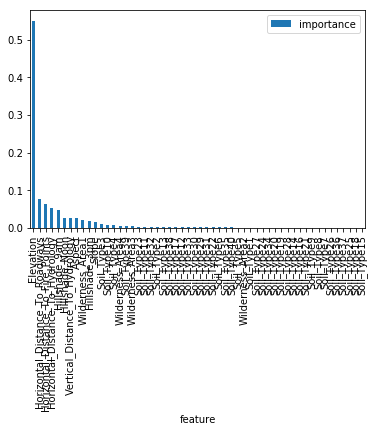

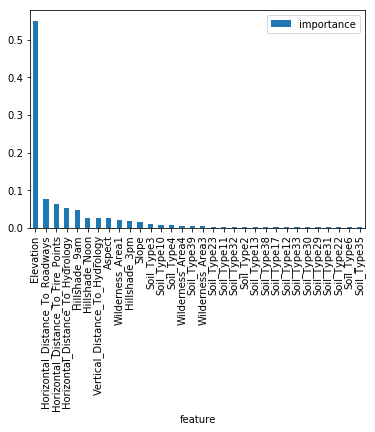

In [5]:
# Report Feature Importnace in DTREE 
importance_df = pd.DataFrame({
        'feature': predictors,
        'importance': dt.feature_importances_
    })

importance_df.sort_values('importance', ascending = False).plot(x='feature', kind='bar')
# only plot importances > 0.001
importance_df1 = importance_df[importance_df['importance'] >= 0.001]
importance_df1.sort_values('importance', ascending = False).plot(x='feature', kind='bar')

### Grid Search with Random Forest 

In [7]:
# Grid Search with Decision Tree
# 'max_leaf_nodes' = [1,3,5]
tree_para = {'n_estimators': [1,3,5],
             'criterion':['gini','entropy'],
             'min_samples_split': [2,4],
             'max_depth': [4,5,6]}


tree_para = {'n_estimators': np.linspace(1, 100, 50, endpoint=True, dtype = int),
             'criterion':['gini','entropy'],
             'min_samples_split': np.linspace(2, 200, 50, endpoint=True, dtype = int),
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

clf = GridSearchCV(RandomForestClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)
print clf.best_params_
print "Best Score %0.2f" % clf.best_score_

rf = DecisionTreeClassifier(criterion=clf.best_params_.get('criterion'),
                           max_depth=clf.best_params_.get('max_depth'))
rf.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
feature_importance = rf.feature_importances_
feats_to_use = 15
feats = np.argsort(-feature_importance)[:15]

print "Accuracy Score on Dev Set: %0.2f%%" % (rf.score(X_dev,y_dev))
preds = rf.predict(X_dev)
mse = np.mean((preds - y_dev) ** 2)
print 'Mean squared error = {}'.format(mse)
print 'R^2 = {}'.format(rf.score(X_train, y_train))

print "\nTop 15 Fetaures in Subset Analysis: Dev Accuracy %0.2f%%" % dt.score(X_dev,y_dev) 
print " Feature%-30s | Importance Value" % ''
for i in range(15):
    print "%-2i %-35s |  %0.3f" %(i, X_train.columns[feats[i]], feature_importance[feats[i]])


In [ ]:
# Report Feature Importnace in DTREE 
importance_df = pd.DataFrame({
        'feature': predictors,
        'importance': rf.feature_importances_
    })

importance_df.sort_values('importance', ascending = False).plot(x='feature', kind='bar')
# only plot importances > 0.001
importance_df1 = importance_df[importance_df['importance'] >= 0.001]
importance_df1.sort_values('importance', ascending = False).plot(x='feature', kind='bar')

In [ ]:
# List of best features